In [25]:
import pandas as pd 
import numpy as np 
import torch
import networkx as nx
import matplotlib.pyplot as plt



In [15]:
df_15_train=pd.read_csv(r'dataset\twitter15\twitter15.train',sep='\t',names=['tweet_id','context','label'])
df_15_train.head()

,tweet_id,context,label
0,724703995147751424,"american family association gets 500,000 to si...",unverified
1,358591089462099968,this week's top story: george zimmerman wins f...,false
2,775672628493357057,clinton hides failing health? full disclosure ...,unverified
3,364589696573124609,fukushima: highly radioactive water seeping in...,false
4,549927969032916993,a transgender 17-year old left a suicide note ...,unverified


In [14]:
df_15_test=pd.read_csv(r'dataset\twitter15\twitter15.test',sep='\t',names=['tweet_id','context','label'])
df_15_test.head()

,tweet_id,context,label
0,507257950868885504,breaking: ap source: tesla motors has selected...,true
1,407213772328022016,fast and furious star paul walker dead in car ...,true
2,531525016794697729,more: officials say they do not know the exten...,unverified
3,689214940679409664,#eagles co-founder glenn frey has died aged 67,non-rumor
4,656361703664451585,well done scotland! 5p carrier bag charge 1 yr...,unverified


In [16]:
df_15_dev=pd.read_csv(r'dataset\twitter15\twitter15.dev',sep='\t',names=['tweet_id','context','label'])
df_15_dev.head()

,tweet_id,context,label
0,693136527816331264,a tiny alpine town in northern italy just welc...,non-rumor
1,755475529294352385,ohio police officer hospitalized after eating ...,unverified
2,744390771869102080,one of the men who wanted to copy the #orlando...,unverified
3,534445263528947712,missouri governor declares state of emergency ...,false
4,691027026552229888,"donald trump spokesperson decried lack of ""pur...",non-rumor


In [17]:
df_15_total=pd.concat([df_15_train,df_15_dev,df_15_test],ignore_index=True)
df_15_total.shape

(1490, 3)

In [18]:
df_15_total.head()

,tweet_id,context,label
0,724703995147751424,"american family association gets 500,000 to si...",unverified
1,358591089462099968,this week's top story: george zimmerman wins f...,false
2,775672628493357057,clinton hides failing health? full disclosure ...,unverified
3,364589696573124609,fukushima: highly radioactive water seeping in...,false
4,549927969032916993,a transgender 17-year old left a suicide note ...,unverified


In [23]:
df_15_graph=pd.read_csv(r'dataset\twitter15\twitter15_graph.txt',sep='\t',names=['tweet_id','userID'])
df_15_graph.head()

,tweet_id,userID
0,517051126466625536,24369345:0.0010266202634307596 388105873:0.000...
1,690252631822864384,731019727:0.026910656620021532 4783269650:0.00...
2,510916647373516800,2788225609:0.06920415224913495 369318439:0.266...
3,767068504277344260,186700511:0.000295195980611528 4026980964:0.09...
4,536547921542791170,17105246:0.005723443223443223 1466329350:0.009...


In [24]:
graphs_dict = {}

# Add nodes and edges to the graphs
for index, row in df_15_graph.iterrows():
    tweet_id = row['tweet_id']
    retweet_data = row['userID']

    # Create a new directed graph for the tweet
    G = nx.DiGraph()
    G.add_node(tweet_id)

    # Handle both spaces and commas as separators
    retweet_pairs = [pair.replace(',', '') for pair in retweet_data.split()]
    for pair in retweet_pairs:
        retweet_id, weight = pair.split(':')
        G.add_edge(tweet_id, int(retweet_id), weight=float(weight))

    # Store the graph in the dictionary
    graphs_dict[tweet_id] = G

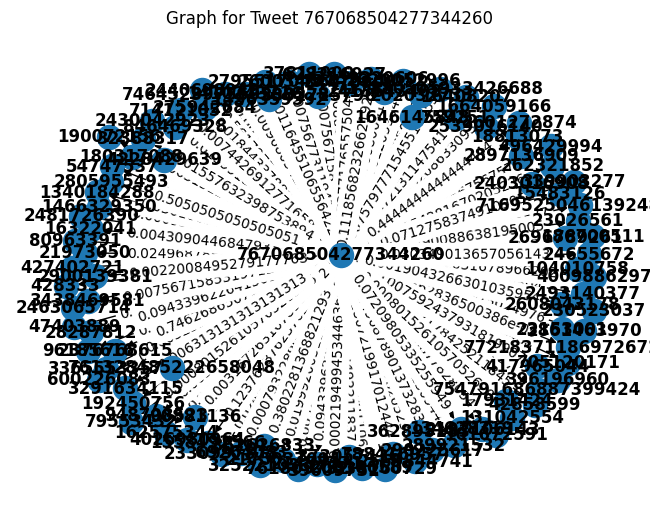

In [26]:
# Choose a specific tweet ID to display
selected_tweet_id = 767068504277344260

# If the selected tweet ID exists in the dictionary, display the graph
if selected_tweet_id in graphs_dict:
    G = graphs_dict[selected_tweet_id]

    # Visualize the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(f'Graph for Tweet {selected_tweet_id}')
    plt.show()
else:
    print(f"Graph for Tweet {selected_tweet_id} not found in the dictionary.")